### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

import warnings
warnings.filterwarnings("ignore")

### Read CSV file and make a Pandas Dataframe

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [5]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
data.head()

,Category Name,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales
0,Sporting Goods,1/31/2018 22:56,13.110000,1,327.75
1,Sporting Goods,1/13/2018 12:27,16.389999,1,327.75
2,Sporting Goods,1/13/2018 12:06,18.030001,1,327.75
3,Sporting Goods,1/13/2018 11:45,22.940001,1,327.75
4,Sporting Goods,1/13/2018 11:24,29.500000,1,327.75


### Feature Extraction for working upon on Dataframe

In [7]:
filter = data['Category Name'].isin(["Women's Apparel"])
#display the filter
filter2 = data[filter]

In [8]:
filter2.shape

(21035, 5)

In [9]:
filter2 = data.loc[filter, ['order date (DateOrders)','Sales','Order Item Quantity','Order Item Discount']]

In [10]:
filter2.head()

,order date (DateOrders),Sales,Order Item Quantity,Order Item Discount
50,3/30/2016 4:37,100.0,2,4.0
52,11/28/2016 1:18,100.0,2,9.0
53,12/31/2016 15:47,100.0,2,13.0
54,10/25/2015 6:24,100.0,2,18.0
70,7/22/2017 7:16,150.0,3,10.5


### Applying to Pandas DateTime format for easy access

In [11]:
filter2['order date (DateOrders)'] =  filter2['order date (DateOrders)'].apply(pd.to_datetime)
filter2.head()

,order date (DateOrders),Sales,Order Item Quantity,Order Item Discount
50,2016-03-30 04:37:00,100.0,2,4.0
52,2016-11-28 01:18:00,100.0,2,9.0
53,2016-12-31 15:47:00,100.0,2,13.0
54,2015-10-25 06:24:00,100.0,2,18.0
70,2017-07-22 07:16:00,150.0,3,10.5


### Sorting the records by date and their time

In [12]:
filter2 = filter2.sort_values(by='order date (DateOrders)')
filter2.head(10)

,order date (DateOrders),Sales,Order Item Quantity,Order Item Discount
109322,2015-01-01 00:21:00,250.0,5,22.50
95938,2015-01-01 01:03:00,150.0,3,27.00
123982,2015-01-01 02:27:00,50.0,1,0.50
141067,2015-01-01 03:51:00,250.0,5,17.50
159984,2015-01-01 04:33:00,50.0,1,0.00
84132,2015-01-01 04:54:00,50.0,1,12.50
15586,2015-01-01 06:39:00,250.0,5,13.75
116380,2015-01-01 07:00:00,100.0,2,12.00
16341,2015-01-01 08:03:00,50.0,1,10.00
16910,2015-01-01 08:03:00,250.0,5,12.50


### Making column of Order date to Index

In [13]:
filter2.set_axis(filter2['order date (DateOrders)'], inplace=True)

filter2.drop(columns=['order date (DateOrders)'],inplace=True)
filter2.head()

,Sales,Order Item Quantity,Order Item Discount
order date (DateOrders),,,
2015-01-01 00:21:00,250.0,5,22.5
2015-01-01 01:03:00,150.0,3,27.0
2015-01-01 02:27:00,50.0,1,0.5
2015-01-01 03:51:00,250.0,5,17.5
2015-01-01 04:33:00,50.0,1,0.0


In [14]:
filter2.shape

(21035, 3)

### Day-wise Aggregates


In [15]:
Item_quantity = filter2.groupby([(filter2.index.year), (filter2.index.month), (filter2.index.day)])['Order Item Quantity'].sum().astype(int)
Item_discount = filter2.groupby([(filter2.index.year), (filter2.index.month), (filter2.index.day)])['Order Item Discount'].sum().astype(int)
Item_sales = filter2.groupby([(filter2.index.year), (filter2.index.month), (filter2.index.day)])['Sales'].sum().astype(int)

### Display in single Dataframe

In [16]:
ItemSales=pd.DataFrame(Item_sales)
ItemDiscount=pd.DataFrame(Item_discount)
ItemQuantity=pd.DataFrame(Item_quantity)

In [17]:
total=ItemSales.join(ItemDiscount)

In [18]:
daily_Sales=total.join(ItemQuantity)

In [19]:
daily_Sales.head()

Sales  \
order date (DateOrders) order date (DateOrders) order date (DateOrders)          
2015                    1                       1                         2700   
                                                2                         2500   
                                                3                         2200   
                                                4                         3750   
                                                5                         1950   

                                                                         Order Item Discount  \
order date (DateOrders) order date (DateOrders) order date (DateOrders)                        
2015                    1                       1                                        314   
                                                2                                        175   
                                                3                                        199   
                                                4                                        389   
                                                5                                        163   

                                                                         Order Item Quantity  
order date (DateOrders) order date (DateOrders) order date (DateOrders)                       
2015                    1                       1                                         54  
                                                2                                         50  
                                                3                                         44  
                                                4                                         75  
                                                5                                         39

### Converting index to single column only

In [20]:
y = daily_Sales.index.get_level_values(0)
m = daily_Sales.index.get_level_values(1)
d = daily_Sales.index.get_level_values(2)

In [21]:
daily_Sales['Date'] = pd.to_datetime(y* 10000 + m * 100 + d * 1, format="%Y%m%d")
daily_Sales.set_index('Date', append=True, inplace=True)

In [22]:
daily_Sales=daily_Sales.droplevel(0)
daily_Sales=daily_Sales.droplevel(0)
daily_Sales=daily_Sales.droplevel(0)

In [23]:
daily_Sales.head(5)

,Sales,Order Item Discount,Order Item Quantity
Date,,,
2015-01-01,2700,314,54
2015-01-02,2500,175,50
2015-01-03,2200,199,44
2015-01-04,3750,389,75
2015-01-05,1950,163,39


### Checking the sum of Column 'Order Item Quantity'

In [24]:
Total = daily_Sales['Order Item Quantity'].sum()
print(Total)


62956


In [25]:
Women_Apparel_Sold = daily_Sales[["Order Item Quantity"]]
Women_Apparel_Sold.tail()

,Order Item Quantity
Date,
2017-09-28,79
2017-09-29,82
2017-09-30,72
2017-10-01,53
2017-10-02,25


In [26]:
Women_Apparel_Sold.shape

(1006, 1)

### FEATURE ENGINEERING

Considering the prior 90 days sales to predict the number of items sold for the month of April_2015 till Sept_2017

In [27]:
April_2015 = Women_Apparel_Sold.iloc[1:90]
May_2015 = Women_Apparel_Sold.iloc[31:120]
June_2015 = Women_Apparel_Sold.iloc[62:151]
July_2015 = Women_Apparel_Sold.iloc[92:181]
August_2015 = Women_Apparel_Sold.iloc[123:212]
Sept_2015 = Women_Apparel_Sold.iloc[154:243]
Oct_2015 = Women_Apparel_Sold.iloc[184:273]
Nov_2015 = Women_Apparel_Sold.iloc[215:304]
Dec_2015 = Women_Apparel_Sold.iloc[245:334]
Jan_2016 = Women_Apparel_Sold.iloc[276:365]
Feb_2016 = Women_Apparel_Sold.iloc[307:396]
March_2016 = Women_Apparel_Sold.iloc[336:425]
April_2016 = Women_Apparel_Sold.iloc[367:456]
May_2016 = Women_Apparel_Sold.iloc[397:486]
June_2016 = Women_Apparel_Sold.iloc[428:517]
July_2016 = Women_Apparel_Sold.iloc[458:547]
August_2016 = Women_Apparel_Sold.iloc[489:578]
Sept_2016 = Women_Apparel_Sold.iloc[520:609]
Oct_2016 = Women_Apparel_Sold.iloc[550:639]
Nov_2016 = Women_Apparel_Sold.iloc[581:670]
Dec_2016 = Women_Apparel_Sold.iloc[611:700]
Jan_2017 = Women_Apparel_Sold.iloc[642:731]
Feb_2017 = Women_Apparel_Sold.iloc[673:762]
March_2017 = Women_Apparel_Sold.iloc[701:790]
April_2017 = Women_Apparel_Sold.iloc[732:821]
May_2017 = Women_Apparel_Sold.iloc[762:851]
June_2017 = Women_Apparel_Sold.iloc[793:882]
July_2017 = Women_Apparel_Sold.iloc[823:912]
August_2017 = Women_Apparel_Sold.iloc[854:943]
Sept_2017 = Women_Apparel_Sold.iloc[885:974]

In [28]:
Sept_2017.tail()

,Order Item Quantity
Date,
2017-08-27,73
2017-08-28,67
2017-08-29,47
2017-08-30,57
2017-08-31,65


### Taking Transpose to convert 90 days sales as Single row/record for each month to be predicted

In [29]:
Row_1 = pd.DataFrame(April_2015.to_numpy().T).add_prefix('Day')
Row_2 = pd.DataFrame(May_2015.to_numpy().T).add_prefix('Day')
Row_3 = pd.DataFrame(June_2015.to_numpy().T).add_prefix('Day')
Row_4 = pd.DataFrame(July_2015.to_numpy().T).add_prefix('Day')
Row_5 = pd.DataFrame(August_2015.to_numpy().T).add_prefix('Day')
Row_6 = pd.DataFrame(Sept_2015.to_numpy().T).add_prefix('Day')
Row_7 = pd.DataFrame(Oct_2015.to_numpy().T).add_prefix('Day')
Row_8 = pd.DataFrame(Nov_2015.to_numpy().T).add_prefix('Day')
Row_9 = pd.DataFrame(Dec_2015.to_numpy().T).add_prefix('Day')
Row_10 = pd.DataFrame(Jan_2016.to_numpy().T).add_prefix('Day')
Row_11 = pd.DataFrame(Feb_2016.to_numpy().T).add_prefix('Day')
Row_12 = pd.DataFrame(March_2016.to_numpy().T).add_prefix('Day')
Row_13 = pd.DataFrame(April_2016.to_numpy().T).add_prefix('Day')
Row_14 = pd.DataFrame(May_2016.to_numpy().T).add_prefix('Day')
Row_15 = pd.DataFrame(June_2016.to_numpy().T).add_prefix('Day')
Row_16 = pd.DataFrame(July_2016.to_numpy().T).add_prefix('Day')
Row_17 = pd.DataFrame(August_2016.to_numpy().T).add_prefix('Day')
Row_18 = pd.DataFrame(Sept_2016.to_numpy().T).add_prefix('Day')
Row_19 = pd.DataFrame(Oct_2016.to_numpy().T).add_prefix('Day')
Row_20 = pd.DataFrame(Nov_2016.to_numpy().T).add_prefix('Day')
Row_21 = pd.DataFrame(Dec_2016.to_numpy().T).add_prefix('Day')
Row_22 = pd.DataFrame(Jan_2017.to_numpy().T).add_prefix('Day')
Row_23 = pd.DataFrame(Feb_2017.to_numpy().T).add_prefix('Day')
Row_24 = pd.DataFrame(March_2017.to_numpy().T).add_prefix('Day')
Row_25 = pd.DataFrame(April_2017.to_numpy().T).add_prefix('Day')
Row_26 = pd.DataFrame(May_2017.to_numpy().T).add_prefix('Day')
Row_27 = pd.DataFrame(June_2017.to_numpy().T).add_prefix('Day')
Row_28 = pd.DataFrame(July_2017.to_numpy().T).add_prefix('Day')
Row_29 = pd.DataFrame(August_2017.to_numpy().T).add_prefix('Day')
Row_30 = pd.DataFrame(Sept_2017.to_numpy().T).add_prefix('Day')

In [30]:
Row_30

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,77,51,44,67,63,78,41,63,50,97,...,65,49,55,83,60,73,67,47,57,65


### Merging all Rows to prepare the DataFrame

In [31]:
merge2=Row_1.append(Row_2,ignore_index=True)
merge3=merge2.append(Row_3,ignore_index=True)
merge4=merge3.append(Row_4,ignore_index=True)
merge5=merge4.append(Row_5,ignore_index=True)
merge6=merge5.append(Row_6,ignore_index=True)
merge7=merge6.append(Row_7,ignore_index=True)
merge8=merge7.append(Row_8,ignore_index=True)
merge9=merge8.append(Row_9,ignore_index=True)
merge10=merge9.append(Row_10,ignore_index=True)
merge11=merge10.append(Row_11,ignore_index=True)
merge12=merge11.append(Row_12,ignore_index=True)
merge13=merge12.append(Row_13,ignore_index=True)
merge14=merge13.append(Row_14,ignore_index=True)
merge15=merge14.append(Row_15,ignore_index=True)
merge16=merge15.append(Row_16,ignore_index=True)
merge17=merge16.append(Row_17,ignore_index=True)
merge18=merge17.append(Row_18,ignore_index=True)
merge19=merge18.append(Row_19,ignore_index=True)
merge20=merge19.append(Row_20,ignore_index=True)
merge21=merge20.append(Row_21,ignore_index=True)
merge22=merge21.append(Row_22,ignore_index=True)
merge23=merge22.append(Row_23,ignore_index=True)
merge24=merge23.append(Row_24,ignore_index=True)
merge25=merge24.append(Row_25,ignore_index=True)
merge26=merge25.append(Row_26,ignore_index=True)
merge27=merge26.append(Row_27,ignore_index=True)
merge28=merge27.append(Row_28,ignore_index=True)
merge29=merge28.append(Row_29,ignore_index=True)
merge30=merge29.append(Row_30,ignore_index=True)

In [32]:
merge30

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,50,44,75,39,32,58,73,57,52,67,...,67,57,74,44,65,59,89,100,84,86
1,95,67,49,48,25,50,87,70,53,62,...,43,61,57,58,51,64,55,52,89,69
2,71,44,56,35,71,77,58,43,44,51,...,49,67,84,62,67,79,77,82,68,47
3,71,73,55,64,92,48,73,86,49,102,...,47,70,80,71,74,60,39,38,55,52
4,54,40,84,75,39,67,43,48,56,89,...,60,42,62,53,78,117,74,80,70,49
5,57,50,62,60,58,46,63,39,56,42,...,57,54,34,49,76,73,69,82,56,69
6,52,66,37,72,75,74,85,75,57,63,...,89,73,104,74,49,72,66,62,70,51
7,52,81,66,68,51,49,65,66,74,67,...,71,38,44,53,48,85,60,39,71,15
8,61,44,57,67,66,34,44,42,102,45,...,47,49,63,46,81,24,38,54,61,92
9,35,74,73,58,71,67,61,70,73,88,...,69,83,81,80,79,68,58,60,67,92


### Month-wise Aggregated values from April_2015 till Sept_2017


In [33]:
monthlyquantity = daily_Sales.groupby([(daily_Sales.index.year), (daily_Sales.index.month)])['Order Item Quantity'].sum().astype(int)
monthlydiscount = daily_Sales.groupby([(daily_Sales.index.year), (daily_Sales.index.month)])['Order Item Discount'].sum().astype(int)

### Convert into a dataframe

In [34]:
Monthly_Quantity=pd.DataFrame(monthlyquantity)
Monthly_Discount=pd.DataFrame(monthlydiscount)

In [35]:
a = Monthly_Quantity.index.get_level_values(0)
b = Monthly_Quantity.index.get_level_values(1)
c = Monthly_Discount.index.get_level_values(0)
e = Monthly_Discount.index.get_level_values(1)

In [36]:
Monthly_Quantity['Index'] = pd.to_datetime(a* 10000 + b * 100 + 1, format="%Y%m%d")
Monthly_Discount['Index'] = pd.to_datetime(c* 10000 + e * 100 + 1, format="%Y%m%d")

In [37]:
Monthly_Quantity.set_index('Index', append=True, inplace=True)
Monthly_Discount.set_index('Index', append=True, inplace=True)

In [38]:
Monthly_Quantity=Monthly_Quantity.droplevel(0)
Monthly_Quantity=Monthly_Quantity.droplevel(0)
Monthly_Discount=Monthly_Discount.droplevel(0)
Monthly_Discount=Monthly_Discount.droplevel(0)

In [39]:
Monthly_Quantity.tail()

,Order Item Quantity
Index,
2017-06-01,1889
2017-07-01,1867
2017-08-01,1926
2017-09-01,1969
2017-10-01,78


In [40]:
Monthly_Quantity.shape

(34, 1)

### Slicing and Selecting monthly Items sold from April_2015 till Sept_2017


In [41]:
MonthlyDiscount = Monthly_Discount.iloc[3:33]
MonthlyQuantity = Monthly_Quantity.iloc[3:33]

In [42]:
MonthlyQuantity.shape


(30, 1)

### List down the values of monthly Item Quantity sold from April_2015 till Sept_2017

In [43]:
MonthlyItemQuantity = MonthlyQuantity['Order Item Quantity'].tolist()
MonthlyItemDiscount = MonthlyDiscount['Order Item Discount'].tolist()
print(MonthlyItemQuantity)
print(MonthlyItemDiscount)

[1938, 1926, 1742, 2163, 1920, 1875, 1962, 1773, 1873, 2069, 1715, 1847, 1797, 1923, 1881, 1969, 2082, 1859, 2011, 1847, 1859, 1974, 1956, 2036, 1702, 1860, 1889, 1867, 1926, 1969]
[9855, 9757, 8833, 11061, 9651, 9500, 9952, 8891, 9603, 10439, 8703, 9405, 8995, 9829, 9485, 9969, 10608, 9528, 10065, 9445, 9449, 9863, 9867, 10446, 8525, 9661, 9392, 9361, 9816, 9869]


### Create copy of the dataset

In [44]:
df1 = merge30.copy()

In [45]:
df1

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,50,44,75,39,32,58,73,57,52,67,...,67,57,74,44,65,59,89,100,84,86
1,95,67,49,48,25,50,87,70,53,62,...,43,61,57,58,51,64,55,52,89,69
2,71,44,56,35,71,77,58,43,44,51,...,49,67,84,62,67,79,77,82,68,47
3,71,73,55,64,92,48,73,86,49,102,...,47,70,80,71,74,60,39,38,55,52
4,54,40,84,75,39,67,43,48,56,89,...,60,42,62,53,78,117,74,80,70,49
5,57,50,62,60,58,46,63,39,56,42,...,57,54,34,49,76,73,69,82,56,69
6,52,66,37,72,75,74,85,75,57,63,...,89,73,104,74,49,72,66,62,70,51
7,52,81,66,68,51,49,65,66,74,67,...,71,38,44,53,48,85,60,39,71,15
8,61,44,57,67,66,34,44,42,102,45,...,47,49,63,46,81,24,38,54,61,92
9,35,74,73,58,71,67,61,70,73,88,...,69,83,81,80,79,68,58,60,67,92


### Adding the Target variable to the dataframe

In [46]:
df1.insert(loc=89, column='Order Item Quantity', value=MonthlyItemQuantity)

In [47]:
df1

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity
0,50,44,75,39,32,58,73,57,52,67,...,57,74,44,65,59,89,100,84,86,1938
1,95,67,49,48,25,50,87,70,53,62,...,61,57,58,51,64,55,52,89,69,1926
2,71,44,56,35,71,77,58,43,44,51,...,67,84,62,67,79,77,82,68,47,1742
3,71,73,55,64,92,48,73,86,49,102,...,70,80,71,74,60,39,38,55,52,2163
4,54,40,84,75,39,67,43,48,56,89,...,42,62,53,78,117,74,80,70,49,1920
5,57,50,62,60,58,46,63,39,56,42,...,54,34,49,76,73,69,82,56,69,1875
6,52,66,37,72,75,74,85,75,57,63,...,73,104,74,49,72,66,62,70,51,1962
7,52,81,66,68,51,49,65,66,74,67,...,38,44,53,48,85,60,39,71,15,1773
8,61,44,57,67,66,34,44,42,102,45,...,49,63,46,81,24,38,54,61,92,1873
9,35,74,73,58,71,67,61,70,73,88,...,83,81,80,79,68,58,60,67,92,2069


In [48]:
Y = df1["Order Item Quantity"]
X = df1.drop(columns=["Order Item Quantity"])

## Fitting the Model

# XgBoost Regressor
### VARIATION-I [FEATURES : Previous 90 Days Sales]

### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df1, test_size=0.2, shuffle=False, random_state=1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 24
No. of testing examples: 6


In [50]:
x_train, y_train = training_data.drop("Order Item Quantity", axis=1), training_data['Order Item Quantity']
x_test, y_test   = testing_data.drop("Order Item Quantity", axis=1) , testing_data['Order Item Quantity']

In [51]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

[00:27:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

### Evaluation Metric

In [52]:
preds = pd.DataFrame(model.predict(x_test))

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
print("\tMean absolute error (MAE):", mean_absolute_error(y_test, preds))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(y_test, preds)))

	Mean absolute error (MAE): 83.69883219401042
	Root Mean squared error (RMSE): 111.52784984080715


In [55]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds)*100

4.628934248173644

In [56]:
print(y_test)

print(preds)

24    1702
25    1860
26    1889
27    1867
28    1926
29    1969
Name: Order Item Quantity, dtype: int64
             0
0  1909.161133
1  1812.569824
2  1888.194336
3  1988.933105
4  1805.251709
5  1973.114624


In [57]:
Y = df1["Order Item Quantity"]
X = df1.drop(columns=["Order Item Quantity"])

## K-fold Cross Validation

In [58]:
# Since the Data is limited for training we will use k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import absolute
from numpy import sqrt




In [59]:
df1.shape

(30, 90)

In [60]:
#define cross-validation method to use

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build xtreme gradient boosting model
xgboost = xgb.XGBRegressor() 

### Model Evaluation

In [61]:
#use k-fold CV to evaluate model
score1 = cross_val_score(xgboost, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
#view mean absolute errors
score1


array([ -69.46663411, -119.69714355, -174.60860189,  -81.73620605,
        -67.48608398, -112.58699544, -146.95967611,  -61.35563151,
       -108.91190592,  -58.05586751])

In [62]:
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 100.086474609375


In [63]:
score2 = cross_val_score(xgboost, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 120.35236196592693


In [64]:
from sklearn.metrics import make_scorer

#define custom function which returns single output as metric score
def MAPE(y_true, y_pred): 
    return 1 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#make scorer from custome function
mape_scorer = make_scorer(MAPE)

#cross validation score on model
#reg = LinearRegression()
score3 = cross_val_score(xgboost, X, Y, scoring=mape_scorer, cv=cv)
score3

[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([-2.95904639, -5.42965886, -8.09251713, -3.09426728, -2.70489664,
       -4.96841746, -6.37498339, -2.12507667, -4.41592377, -2.19427977])

In [65]:
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 4.235906735154936


### Predicted Values

In [66]:
predictions = cross_val_predict(xgboost, X,Y, cv=cv)
print(predictions)

[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

# XgBoost Regressor
### VARIATION-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount]

In [67]:
df2 = df1.copy()

In [68]:
df2.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity
0,50,44,75,39,32,58,73,57,52,67,...,57,74,44,65,59,89,100,84,86,1938
1,95,67,49,48,25,50,87,70,53,62,...,61,57,58,51,64,55,52,89,69,1926
2,71,44,56,35,71,77,58,43,44,51,...,67,84,62,67,79,77,82,68,47,1742
3,71,73,55,64,92,48,73,86,49,102,...,70,80,71,74,60,39,38,55,52,2163
4,54,40,84,75,39,67,43,48,56,89,...,42,62,53,78,117,74,80,70,49,1920


### Adding a Regressor variable to the dataframe

In [69]:
df2.insert(loc=90, column='Order Item Discount', value=MonthlyItemDiscount)

In [70]:
Y1 = df2["Order Item Quantity"]
X1 = df2.drop(columns=["Order Item Quantity"])

In [71]:
df2.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity,Order Item Discount
0,50,44,75,39,32,58,73,57,52,67,...,74,44,65,59,89,100,84,86,1938,9855
1,95,67,49,48,25,50,87,70,53,62,...,57,58,51,64,55,52,89,69,1926,9757
2,71,44,56,35,71,77,58,43,44,51,...,84,62,67,79,77,82,68,47,1742,8833
3,71,73,55,64,92,48,73,86,49,102,...,80,71,74,60,39,38,55,52,2163,11061
4,54,40,84,75,39,67,43,48,56,89,...,62,53,78,117,74,80,70,49,1920,9651


In [72]:
training_data, testing_data = train_test_split(df2, test_size=0.2, shuffle=False, random_state=1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")


No. of training examples: 24
No. of testing examples: 6


In [73]:

x_train, y_train = training_data.drop("Order Item Quantity", axis=1), training_data['Order Item Quantity']
x_test, y_test   = testing_data.drop("Order Item Quantity", axis=1) , testing_data['Order Item Quantity']

# XGBOOST PREDICTION

In [74]:
xgboost.fit(x_train, y_train)

[00:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [75]:
Row25 = x_test.head(1)
Actual_value2 = y_test.head(1)

In [76]:

xgboost_prediction2 = pd.DataFrame(xgboost.predict(Row25))
print(xgboost_prediction2)
print(Actual_value2)

            0
0  1750.51062
24    1702
Name: Order Item Quantity, dtype: int64


In [77]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, xgboost_prediction2))

	Mean absolute error (MAE): 48.5106201171875


###Model Fitting and Model Evaluation

In [78]:
xgboost = xgb.XGBRegressor() 

In [79]:
#use k-fold CV to evaluate model
score1 = cross_val_score(xgboost, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 30.504012044270837


In [80]:
score2 = cross_val_score(xgboost, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 41.40868940620694


In [81]:
score3 = cross_val_score(xgboost, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

[00:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### Predicted Values

In [82]:
predictions = cross_val_predict(xgboost, X1,Y1, cv=cv)
print(predictions)

[00:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

# Linear Regression
### Variation-I    [FEATURES : Previous 90 Days Sales]

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
#build xtreme gradient boosting model
linear = LinearRegression()

In [85]:
#use k-fold CV to evaluate model
score1 = cross_val_score(linear, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))


	Mean absolute error (MAE): 123.8972653624094


In [86]:
score2 = cross_val_score(linear, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 149.41062891608132


In [87]:
score3 = cross_val_score(linear, X, Y, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 5.552580967052245


### Predicted Values

In [88]:
predictions = cross_val_predict(linear, X,Y, cv=cv)
print(predictions)

[1774.12364972 1915.03937761 1988.88734982 1911.11409934 1855.2199161
 1791.37896461 1994.48131431 1828.41194155 1926.30655677 2016.93756573
 1962.3834868  1762.44930406 2008.62952806 2028.65200477 2087.06778919
 1820.84930445 1892.46701401 1961.94996327 1880.49453956 1878.22456882
 1886.3834367  1938.9342438  1841.4863012  1757.12958185 1998.72803332
 1994.62641203 1823.18553437 2025.34881589 1933.20515875 1843.55900275]


# Linear Regression
### Variation-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount]

In [89]:
#build xtreme gradient boosting model
linear = LinearRegression()

In [90]:
#use k-fold CV to evaluate model
score1 = cross_val_score(linear, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 18.21828541177172


In [91]:
score2 = cross_val_score(linear, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 22.819688761856415


In [92]:
score3 = cross_val_score(linear, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 0.3550581449961038


### Predicted Values

In [93]:
predictions = cross_val_predict(linear, X1, Y1, cv=cv)
print(predictions)

[1936.43053618 1926.9230473  1773.80292812 2179.6761544  1921.09024322
 1854.8319005  1980.01958198 1766.91615639 1895.47577846 2039.03622526
 1723.00073097 1831.57310345 1798.59917563 1953.09185883 1882.97726081
 1978.08871154 2065.68681386 1905.34202026 1973.68882635 1860.55318629
 1872.81434251 1946.63911359 1946.63727776 2062.01039689 1696.22138989
 1904.30549082 1849.97499102 1870.16742862 1936.04702234 1929.80046237]


#  LINEAR REGESSION PREDICTION

In [94]:
linear.fit(x_train, y_train)

LinearRegression()

In [95]:
linear_prediction2 = pd.DataFrame(linear.predict(Row25))
print(linear_prediction2)
print(Actual_value2)

             0
0  1689.421534
24    1702
Name: Order Item Quantity, dtype: int64


In [96]:


print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, linear_prediction2))

	Mean absolute error (MAE): 12.578466398877254


# Random Forest Regressor
### Variation-I [FEATURES : Previous 90 Days Sales]

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

In [99]:
#use k-fold CV to evaluate model
score1 = cross_val_score(regressor, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 90.92299999999997


In [100]:
score2 = cross_val_score(regressor, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 111.79426540152524


In [101]:
score3 = cross_val_score(regressor, X, Y, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 3.8000159250884287


### Predicted Values

In [102]:
predictions = cross_val_predict(regressor, X,Y, cv=cv)
print(predictions)


[1891.32 1867.51 1959.18 1933.16 1889.41 1891.52 1998.1  1879.37 1887.23
 1924.17 1894.47 1902.12 1904.76 1937.88 1959.3  1846.22 1917.77 1906.28
 1889.14 1969.15 1931.79 1968.3  1891.78 1896.38 1945.37 1901.67 1914.62
 1924.98 1847.41 1885.53]


# Random Forest Regressor
### Variation-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount ]

In [103]:
#use k-fold CV to evaluate model
score1 = cross_val_score(regressor, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 33.275000000000006


In [104]:
score2 = cross_val_score(regressor, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 46.15449364182575


In [105]:
score3 = cross_val_score(regressor, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 0.8849234508570095


### Predicted Values

In [106]:
predictions = cross_val_predict(regressor, X1,Y1, cv=cv)
print(predictions)

[1973.23 1931.23 1799.13 2007.99 1874.61 1852.83 1996.85 1796.82 1860.47
 2030.98 1793.58 1845.05 1803.1  1962.45 1850.69 1989.63 2018.59 1850.1
 1981.22 1854.84 1855.59 1984.7  1978.95 2018.86 1803.7  1904.6  1859.13
 1859.19 1953.22 1985.52]


# RANDOM FOREST PREDICTION

In [107]:
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [108]:
Forest_prediction2 = pd.DataFrame(regressor.predict(Row25))
print(Forest_prediction2)
print(Actual_value2)

        0
0  1814.1
24    1702
Name: Order Item Quantity, dtype: int64


In [109]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, Forest_prediction2))

	Mean absolute error (MAE): 112.09999999999991


#ARIMA IMPLEMENTATION

In [110]:
Monthly_Quantity.drop(Monthly_Quantity.tail(1).index,inplace=True)

In [111]:
Monthly_Quantity.shape

(33, 1)

### Plotting the Rolling Mean and STD of the data to see if it is stationary

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

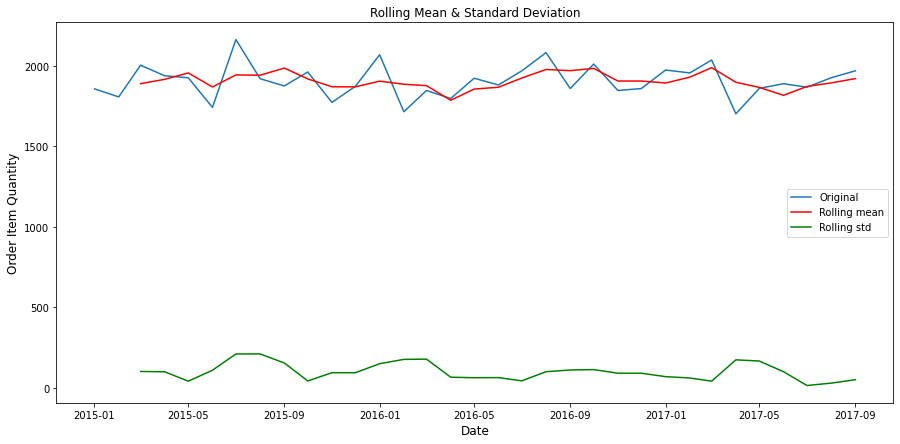

In [112]:
plt.figure(figsize=(15,7))
plt.plot(Monthly_Quantity["Order Item Quantity"], label='Original')
plt.plot(Monthly_Quantity["Order Item Quantity"].rolling(window=3).mean(), color='red', label='Rolling mean')
plt.plot(Monthly_Quantity["Order Item Quantity"].rolling(window=3).std(), color='green', label='Rolling std')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Item Quantity', fontsize=12)
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [113]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

### TEST for checking the stationarity of Data

In [114]:
adf_test = adfuller(Monthly_Quantity)
print(f'p-value: {adf_test[1]}')

p-value: 6.055757579119e-10


Since the p-value is less than 0.05, it means data is stationary

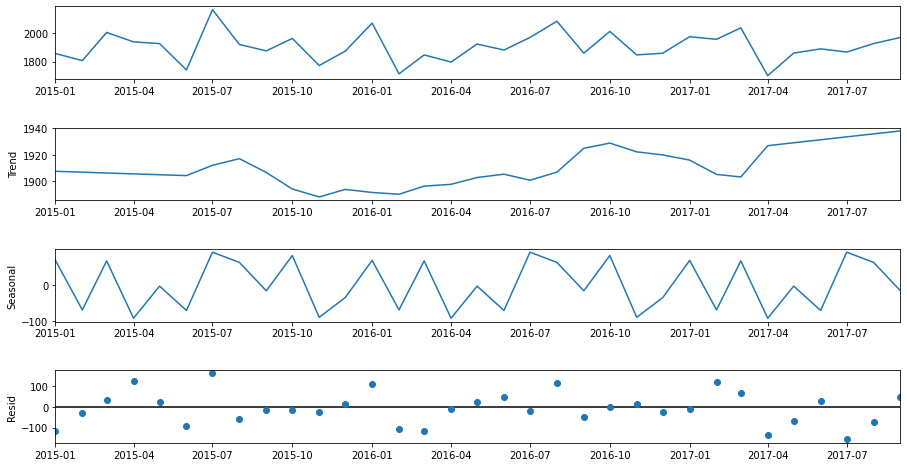

In [115]:

def seasonal_decompose (Monthly_Quantity):
    decomposition = sm.tsa.seasonal_decompose(Monthly_Quantity, model='additive', extrapolate_trend=12)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()
    
    return trend, seasonal, residual
 
trend, seasonal, residual = seasonal_decompose(Monthly_Quantity)

Text(0.5, 1.0, 'Daily_Sales')

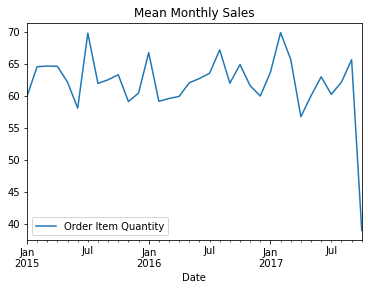

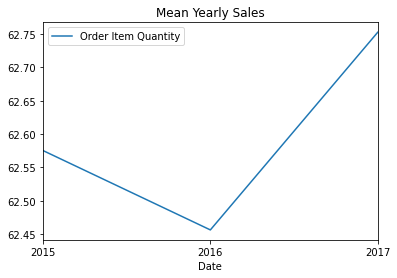

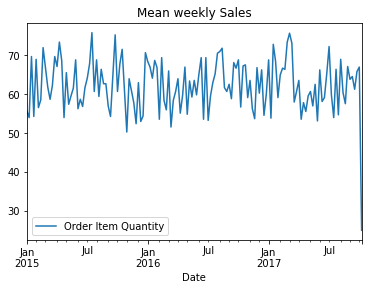

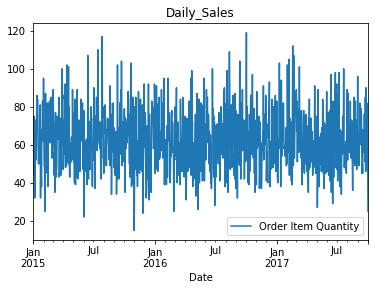

In [116]:
sales_agg_monthly = Women_Apparel_Sold.resample("M")[["Order Item Quantity"]].mean()
sales_agg_monthly.plot()
plt.title('Mean Monthly Sales')

sales_agg_yearly = Women_Apparel_Sold.resample("Y")[["Order Item Quantity"]].mean()
sales_agg_yearly.plot()
plt.title('Mean Yearly Sales')

sales_agg_weekly = Women_Apparel_Sold.resample("W")[["Order Item Quantity"]].mean()
sales_agg_weekly.plot()
plt.title('Mean weekly Sales')

sales_agg_daily = Women_Apparel_Sold.resample("D")[["Order Item Quantity"]].mean()
sales_agg_daily.plot()
plt.title('Daily_Sales')

In [117]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [118]:
from pmdarima import auto_arima

Adding Exogenous variable

In [119]:
Monthly_Discount.drop(Monthly_Discount.tail(1).index,inplace=True)
Monthly_Discount.shape

(33, 1)

In [120]:
Exog = Monthly_Discount[['Order Item Discount']].to_numpy()


In [121]:


# Split the data into training and test sets
train_data = Monthly_Quantity[:int(0.8*len(Monthly_Quantity))]
test_data = Monthly_Quantity[int(0.8*len(Monthly_Quantity)):]

# Create an auto_arima model
model = auto_arima(train_data, exogenous=Exog, start_p=5, start_q=1,
                   max_p=10, max_q=3, m=1, d=None, 
                    trace=True,
                   error_action='ignore',  # don't want to know if an order does not work
                   suppress_warnings=True,  # don't want convergence warnings
                   stepwise=True)  # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=328.288, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=319.121, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=319.156, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=318.736, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=468.682, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=321.162, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=320.677, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=322.571, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.856 seconds


In [122]:
# Fit the model to the training data
model.fit(train_data)

# Make predictions on the test data
predictions = model.predict(n_periods=len(test_data))

In [123]:
predictions

2017-03-01    1888.938279
2017-04-01    1908.961071
2017-05-01    1908.961071
2017-06-01    1908.961071
2017-07-01    1908.961071
2017-08-01    1908.961071
2017-09-01    1908.961071
Freq: MS, dtype: float64

Evaluate the model's performance

In [124]:
MAE = (mean_absolute_error(predictions,test_data))
print(MAE)

77.42626626720435


In [125]:
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f' Root Mean Squared Error: {rmse:.3f}')

 Root Mean Squared Error: 102.058


In [126]:
MAPE = (mean_absolute_percentage_error(test_data, predictions))*100
print("MAPE:", MAPE)

MAPE: 4.179051967186745


#ARIMA PREDICTION

In [127]:
Arima_prediction2 = predictions.iloc[1:2]
Arima_prediction2 = Arima_prediction2.tolist()
print(Arima_prediction2)
print(Actual_value2)

[1908.961071402265]
24    1702
Name: Order Item Quantity, dtype: int64


In [128]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, Arima_prediction2))

	Mean absolute error (MAE): 206.9610714022649


# Exponential Smoothing

In [129]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [130]:
def simple_exponential_smoothing(MonthlyItemQuantity, alpha):
    """
    Perform simple exponential smoothing.
    Args:
        series: input series
        alpha: smoothing factor (between 0 and 1)
    Returns:
        smoothed series
    """
    # Initialize the smoothed series with the first value of the input series
    smoothed_series = [MonthlyItemQuantity[0]]
    # Loop through the rest of the series
    for t in range(1, len(MonthlyItemQuantity)):
        # Calculate the smoothed value for time t
        smoothed_series.append(alpha * MonthlyItemQuantity[t] + (1 - alpha) * smoothed_series[t-1])
    return smoothed_series

In [131]:
alpha = 0.7

smoothed_series = simple_exponential_smoothing(MonthlyItemQuantity, alpha)
print(smoothed_series)

[1938, 1929.6, 1798.28, 2053.584, 1960.0752, 1900.52256, 1943.556768, 1824.1670304, 1858.35010912, 2005.8050327360002, 1802.2415098208003, 1833.57245294624, 1807.971735883872, 1888.4915207651616, 1883.2474562295483, 1943.2742368688646, 2040.3822710606594, 1913.4146813181978, 1981.7244043954593, 1887.4173213186377, 1867.5251963955914, 1942.0575589186774, 1951.817267675603, 2010.7451803026809, 1794.6235540908042, 1840.3870662272413, 1874.4161198681725, 1869.2248359604519, 1908.9674507881355, 1950.9902352364406]


In [132]:
errors = []
for a, f in zip(MonthlyItemQuantity, smoothed_series):
    errors.append(a - f)

# Calculate the MSE
mse = np.sum(np.square(errors)) / len(errors)

# Calculate the RMSE
rmse = np.sqrt(mse)

print("Errors:", errors)
print("RMSE:", rmse)

MAE = (mean_absolute_error(smoothed_series,MonthlyItemQuantity))
print("MAE:", MAE)

MAPE = (mean_absolute_percentage_error(smoothed_series, MonthlyItemQuantity))*100
print("MAPE:", MAPE)

Errors: [0, -3.599999999999909, -56.27999999999997, 109.41600000000017, -40.075199999999995, -25.522560000000112, 18.44323200000008, -51.16703039999993, 14.64989087999993, 63.19496726399984, -87.24150982080027, 13.427547053760009, -10.971735883872043, 34.50847923483843, -2.247456229548334, 25.72576313113541, 41.61772893934062, -54.414681318197836, 29.27559560454074, -40.41732131863773, -8.525196395591365, 31.942441081322613, 4.182732324396966, 25.254819697319135, -92.62355409080419, 19.61293377275865, 14.583880131827527, -2.2248359604518555, 17.032549211864534, 18.00976476355936]
RMSE: 42.060823028492436
MAE: 31.872980216952254
MAPE: 1.6729354214112317


#Exponential Smoothing PREDICTION

In [133]:
Monthly_Quantity.shape

(33, 1)

In [134]:
train_data = Monthly_Quantity[:int(0.8*len(Monthly_Quantity))]
test_data = Monthly_Quantity[int(0.8*len(Monthly_Quantity)):]

In [135]:
alpha = 0.7

In [136]:
model = SimpleExpSmoothing(train_data['Order Item Quantity'])
fit = model.fit(smoothing_level=alpha)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # If an index is available, see if it is a date-based index or if it


In [137]:
ES_predictions2 = fit.predict(start=test_data.index[0], end=test_data.index[-1])

In [138]:
ES_prediction2 = ES_predictions2.iloc[1:2]
ES_prediction2 = ES_prediction2.tolist()
ES_prediction2

[1951.817267675614]

In [139]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, ES_prediction2))

	Mean absolute error (MAE): 249.81726767561395


# COMBINING PREDICTION OF THE 5 MODELS

In [140]:
df_vertical = pd.concat([xgboost_prediction2, linear_prediction2, Forest_prediction2])

In [141]:
array = df_vertical.values
array

array([[1750.51062012],
       [1689.4215336 ],
       [1814.1       ]])

In [142]:
array = np.append(array, Arima_prediction2)
print(array)

[1750.51062012 1689.4215336  1814.1        1908.9610714 ]


# INPUT FOR Multilayer perceptron

In [143]:
input_array = np.append(array, ES_prediction2)
print(input_array)

[1750.51062012 1689.4215336  1814.1        1908.9610714  1951.81726768]


In [144]:
Actual_value2

24    1702
Name: Order Item Quantity, dtype: int64

#FINAL OUTPUT

Implement multilayer perceptron to get the final forecast for Women's Apparel

In [156]:
input = input_array
input

array([1750.51062012, 1689.4215336 , 1814.1       , 1908.9610714 ,
       1951.81726768])

In [202]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.hidden_size_2 = hidden_size_2
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden_1 = np.random.randn(self.input_size, self.hidden_size_1)
        self.biases_input_hidden_1 = np.zeros(self.hidden_size_1)
        self.weights_hidden_1_hidden_2 = np.random.randn(self.hidden_size_1, self.hidden_size_2)
        self.biases_hidden_1_hidden_2 = np.zeros(self.hidden_size_2)
        self.weights_hidden_2_output = np.random.randn(self.hidden_size_2, self.output_size)
        self.biases_hidden_2_output = np.zeros(self.output_size)

    def forward(self, input):
        # Propagate input through the network
        self.hidden_1 = np.dot(input, self.weights_input_hidden_1) + self.biases_input_hidden_1
        self.hidden_2 = np.dot(self.hidden_1, self.weights_hidden_1_hidden_2) + self.biases_hidden_1_hidden_2
        self.output = np.dot(self.hidden_2, self.weights_hidden_2_output) + self.biases_hidden_2_output
        return self.output

# Create an MLP with 5 inputs,


# Create an MLP with 5 inputs, 2 hidden layers, and 1 output
mlp = MLP(5, 4, 3, 1)

# Propagate some input through the network and print the output
input = input_array
output = mlp.forward(input)
print(output)

[1633.98501656]


# Calculate Error for final Output

In [203]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, output))

	Mean absolute error (MAE): 68.01498344174138
